In [100]:
# importing features list from user_playlist_songs.py including all the songs and its features
import import_ipynb
from user_playlist_songs import features_list as fl_user_playlist
from user_last_played_songs import features_list as fl_last_played

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
class create_dict(dict):
    def __init__(self):
        self = dict()

    def add(self, key, value):
        self[key] = value

# Data Wrangling the All of User's Playlists

In [103]:
songs_playlist_df = pd.DataFrame(fl_user_playlist) # converting list to pandas dataframe
songs_playlist_df.head()

,track_name,artist_name,artist_pop,artist_genres,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_pop
0,You Right,Doja Cat,88,"[dance pop, pop]",Planet Her,0.828,0.621,-6.414,0.0565,0.016400,0.002330,0.0845,0.436,128.986,186173,4,85
1,Wild Side (feat. Cardi B),Normani,68,"[dance pop, pop, post-teen pop, r&b, urban con...",Wild Side (feat. Cardi B),0.740,0.576,-6.744,0.1460,0.024900,0.000000,0.1040,0.315,110.095,209476,4,7
2,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,90,"[canadian pop, pop]",Justice,0.677,0.696,-6.181,0.1190,0.321000,0.000000,0.4200,0.464,90.030,198082,4,87
3,Chicken Lemon Rice,Priya Ragu,42,[zurich indie],damnshestamil,0.516,0.895,-5.770,0.0919,0.000376,0.540000,0.4920,0.694,199.923,153019,4,38
4,LALA (Unlocked) (feat. Swae Lee),Alicia Keys,76,"[hip pop, neo soul, pop, r&b, urban contemporary]",LALA (Unlocked) (feat. Swae Lee),0.615,0.560,-4.938,0.1840,0.088900,0.000114,0.3140,0.330,139.441,266937,4,48


In [104]:
print(songs_playlist_df.shape)
songs_playlist_df.drop_duplicates(subset='track_name', inplace=True) # removing duplicate songs based on track name
print(songs_playlist_df.shape)

(2595, 17)
(2180, 17)


In [105]:
print(songs_playlist_df.isna().sum())
print(songs_playlist_df.dtypes)

track_name          0
artist_name         0
artist_pop          0
artist_genres       0
album               0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
track_pop           0
dtype: int64
track_name           object
artist_name          object
artist_pop            int64
artist_genres        object
album                object
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
track_pop             int64
dtype: object


In [106]:
all_unique_genres_playlist = create_dict()
for genre in songs_playlist_df["artist_genres"]:
    
    for genre_name in genre:
        # creating a bag of words for artist genres based on count of genres
        if genre_name not in all_unique_genres_playlist:
            all_unique_genres_playlist.add(genre_name,1)
        if genre_name in all_unique_genres_playlist:
            all_unique_genres_playlist[genre_name]+=1
        

print(len(all_unique_genres_playlist))

654


In [107]:
# added new column to dataframe for all the unique genres
for row in songs_playlist_df.iterrows():
    genre_score=0 # initializing genre score to 0
    for genre in row[1]["artist_genres"]: # iterating through all the genres of a song
        genre_score = genre_score+all_unique_genres_playlist[genre] # adding the score of each genre to genre score
        
    songs_playlist_df.loc[row[0], "genre_score"] = genre_score # adding the genre score to the dataframe
    # incase genre of a certain is not available in the dataframe, genre_score assigned = 0
    

In [108]:
print(len(all_unique_genres_playlist))

654


In [109]:
from sklearn import preprocessing
le_artist = preprocessing.LabelEncoder()
le_artist.fit(songs_playlist_df['artist_name'])
songs_playlist_df['artist_name'] = le_artist.transform(songs_playlist_df['artist_name']) # encoding artist name

In [110]:
# rearranging columns in dataframe
songs_playlist_df = songs_playlist_df[["track_name", "artist_name" ,"artist_pop", "artist_genres", "album", "danceability", "energy", "loudness",	"speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms" ,"time_signature", "genre_score" ,"track_pop"]]
songs_playlist_df.head()

,track_name,artist_name,artist_pop,artist_genres,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_score,track_pop
0,You Right,334,88,"[dance pop, pop]",Planet Her,0.828,0.621,-6.414,0.0565,0.016400,0.002330,0.0845,0.436,128.986,186173,4,847.0,85
1,Wild Side (feat. Cardi B),868,68,"[dance pop, pop, post-teen pop, r&b, urban con...",Wild Side (feat. Cardi B),0.740,0.576,-6.744,0.1460,0.024900,0.000000,0.1040,0.315,110.095,209476,4,1048.0,7
2,Peaches (feat. Daniel Caesar & Giveon),621,90,"[canadian pop, pop]",Justice,0.677,0.696,-6.181,0.1190,0.321000,0.000000,0.4200,0.464,90.030,198082,4,598.0,87
3,Chicken Lemon Rice,944,42,[zurich indie],damnshestamil,0.516,0.895,-5.770,0.0919,0.000376,0.540000,0.4920,0.694,199.923,153019,4,3.0,38
4,LALA (Unlocked) (feat. Swae Lee),55,76,"[hip pop, neo soul, pop, r&b, urban contemporary]",LALA (Unlocked) (feat. Swae Lee),0.615,0.560,-4.938,0.1840,0.088900,0.000114,0.3140,0.330,139.441,266937,4,668.0,48


In [111]:
songs_playlist_df_num = songs_playlist_df.select_dtypes(include=['int64', 'float64']) # selecting numerical columns
print(type(songs_playlist_df_num))

<class 'pandas.core.frame.DataFrame'>


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_pop', ylabel='Density'>

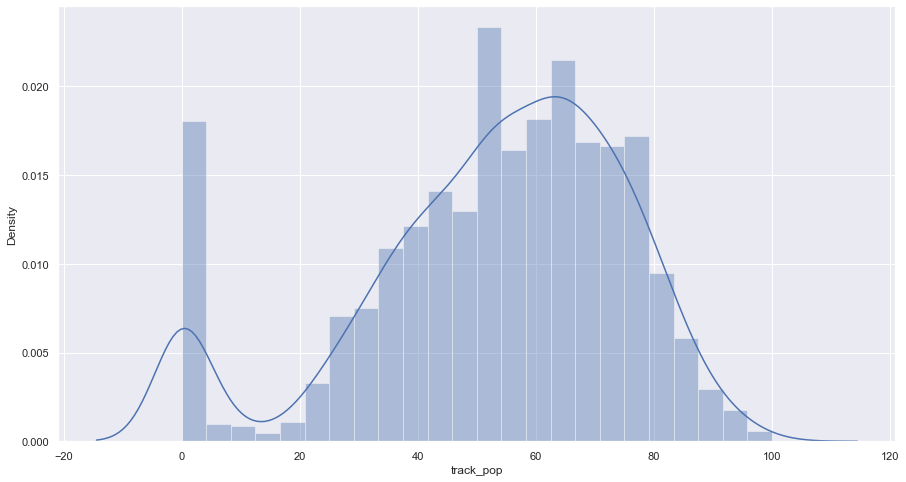

In [112]:
sns.distplot(songs_playlist_df_num['track_pop']) # plotting distribution of track popularity

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_pop', ylabel='Density'>

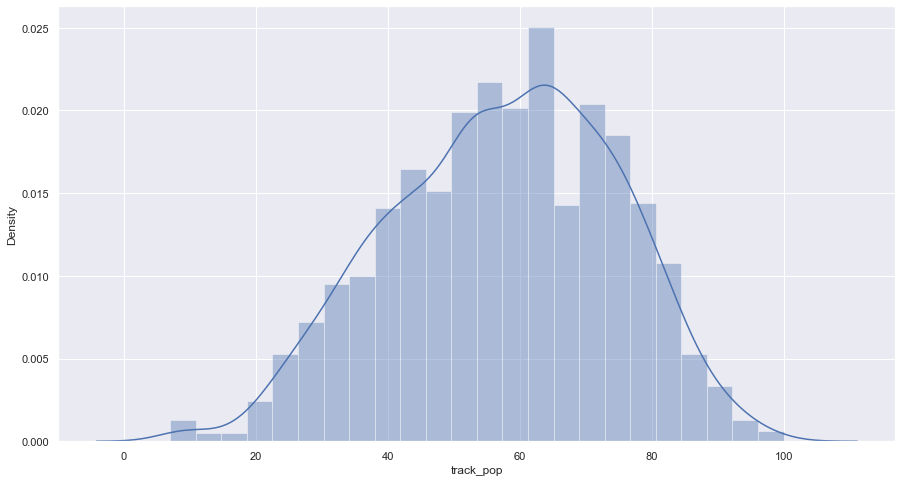

In [113]:
songs_playlist_df_num.drop(songs_playlist_df_num[songs_playlist_df_num['track_pop'] < 7].index, inplace=True) # removing songs with track popularity less than 7
sns.distplot(songs_playlist_df_num['track_pop']) # plotting distribution of track popularity

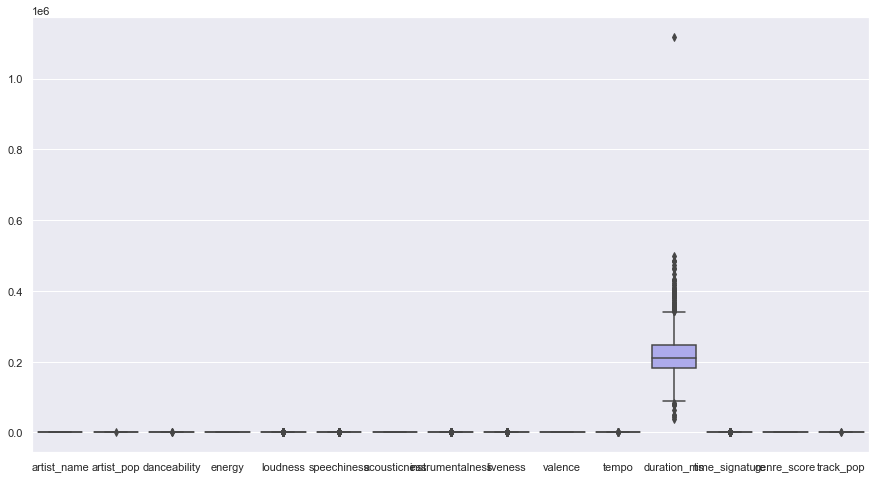

In [114]:
sns.boxplot(data=songs_playlist_df_num) # plotting boxplot of all the numerical columns before scaling (Standard)
sns.set(font_scale=.7)

In [115]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
songs_playlist_df_num_scaled = scaler.fit_transform(songs_playlist_df_num) # scaling numerical columns using min-max scaler


In [116]:
songs_playlist_df_num_scaled = pd.DataFrame(songs_playlist_df_num_scaled, columns=songs_playlist_df_num.columns) #converting numpy array to pandas dataframe
songs_playlist_df_num_scaled.head()

,artist_name,artist_pop,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_score,track_pop
0,-0.847306,1.480806,1.493463,0.143156,0.383230,-0.233278,-0.984460,-0.283695,-0.643321,-0.155730,0.377073,-0.554230,0.217419,1.309282,1.616644
1,0.534465,0.445872,0.910970,-0.053665,0.300234,1.012090,-0.957857,-0.296072,-0.491741,-0.667397,-0.277807,-0.171623,0.217419,1.870017,-2.954028
2,-0.104668,1.584300,0.493958,0.471192,0.441830,0.636393,-0.031104,-0.296072,1.964629,-0.037328,-0.973385,-0.358699,0.217419,0.614641,1.733841
3,0.731122,-0.899544,-0.571739,1.341580,0.545197,0.259303,-1.034613,2.572520,2.524309,0.935261,2.836193,-1.098577,0.217419,-1.045247,-1.137479
4,-1.569242,0.859845,0.083566,-0.123646,0.754447,1.540850,-0.757545,-0.295467,1.140657,-0.603967,0.739509,0.771815,0.217419,0.809921,-0.551495


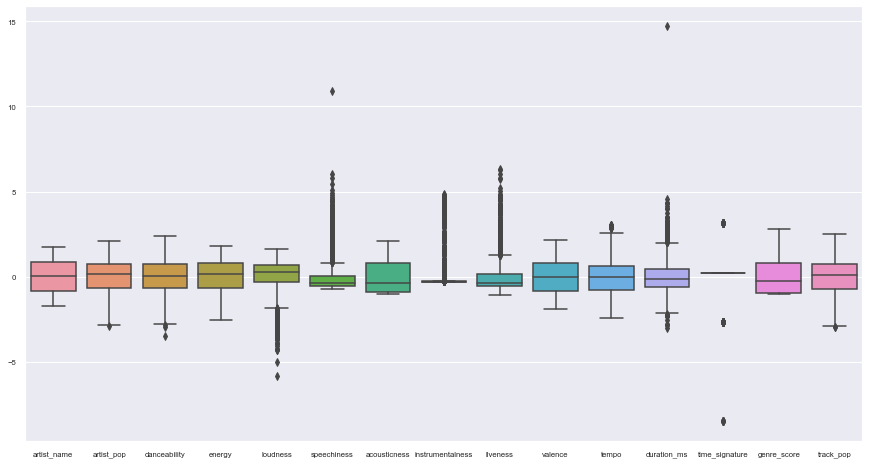

In [117]:
sns.boxplot(data=songs_playlist_df_num_scaled) # plotting boxplot of all the numerical columns after scaling (Standard)
sns.set(font_scale=.5)

In [118]:
# finding correlation between features and target variables
songs_playlist_df_corr = songs_playlist_df_num_scaled.corr()["track_pop"][:-1]
songs_playlist_df_corr
# top_features_playlist = songs_playlist_df_corr[abs(songs_playlist_df_corr) > 0.1].sort_values(ascending=False)
# print(top_features_playlist)

artist_name        -0.031092
artist_pop          0.722820
danceability        0.185299
energy              0.108789
loudness            0.219155
speechiness         0.059606
acousticness       -0.097743
instrumentalness   -0.188187
liveness           -0.022244
valence             0.097027
tempo              -0.013627
duration_ms        -0.105041
time_signature      0.079306
genre_score         0.386505
Name: track_pop, dtype: float64

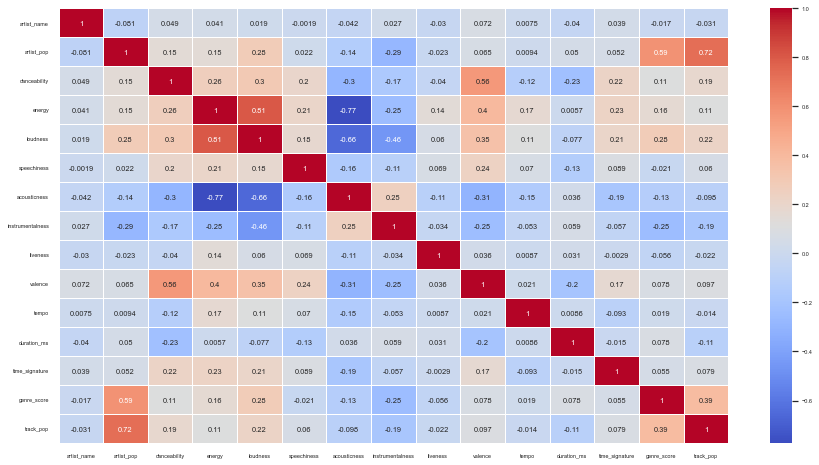

In [119]:
# creating heatmap of correlation between features and target variables
sns.heatmap(songs_playlist_df_num_scaled.corr(), annot=True, annot_kws={"size": 7.5}, cmap='coolwarm', linewidths=.5)
sns.set(rc = {'figure.figsize':(15,8)})

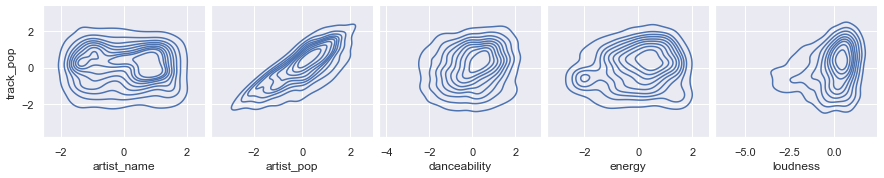

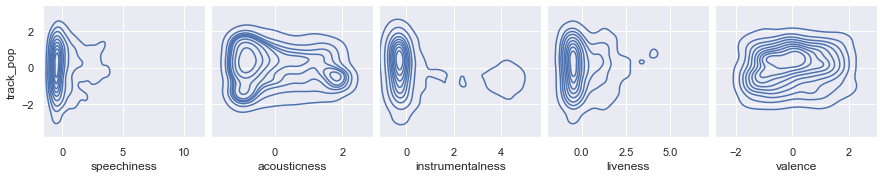

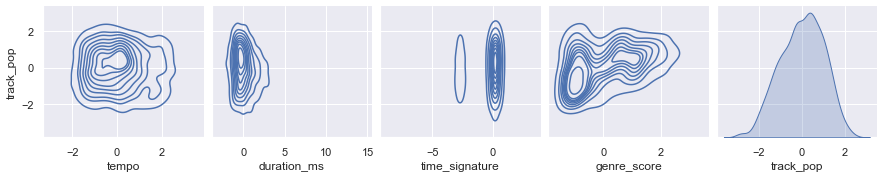

In [120]:
for i in range(0, len(songs_playlist_df_num_scaled.columns), 5):
    sns.pairplot(data=songs_playlist_df_num_scaled,
                x_vars=songs_playlist_df_num_scaled.columns[i:i+5],
                y_vars=["track_pop"],
                kind="kde"
                )


In [121]:
songs_playlist_df.head()

,track_name,artist_name,artist_pop,artist_genres,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_score,track_pop
0,You Right,334,88,"[dance pop, pop]",Planet Her,0.828,0.621,-6.414,0.0565,0.016400,0.002330,0.0845,0.436,128.986,186173,4,847.0,85
1,Wild Side (feat. Cardi B),868,68,"[dance pop, pop, post-teen pop, r&b, urban con...",Wild Side (feat. Cardi B),0.740,0.576,-6.744,0.1460,0.024900,0.000000,0.1040,0.315,110.095,209476,4,1048.0,7
2,Peaches (feat. Daniel Caesar & Giveon),621,90,"[canadian pop, pop]",Justice,0.677,0.696,-6.181,0.1190,0.321000,0.000000,0.4200,0.464,90.030,198082,4,598.0,87
3,Chicken Lemon Rice,944,42,[zurich indie],damnshestamil,0.516,0.895,-5.770,0.0919,0.000376,0.540000,0.4920,0.694,199.923,153019,4,3.0,38
4,LALA (Unlocked) (feat. Swae Lee),55,76,"[hip pop, neo soul, pop, r&b, urban contemporary]",LALA (Unlocked) (feat. Swae Lee),0.615,0.560,-4.938,0.1840,0.088900,0.000114,0.3140,0.330,139.441,266937,4,668.0,48


In [122]:
# saving dataframe to csv file
songs_playlist_csv = songs_playlist_df.to_csv('/Users/nitanshjain/Documents/Data_Science_Learning/Spotify_Recommender_System/csv/songs_playlist_df.csv', index=False)

# Data Wrangling the User's Recently Played Songs (Last 50)

In [123]:
songs_50_df = pd.DataFrame(fl_last_played)
songs_50_df.head()

,track_name,artist_name,artist_pop,artist_genres,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_pop
0,Cheerleader - Felix Jaehn Remix Radio Edit,OMI,64,[dance pop],0.782,0.685,-6.237,0.0309,0.1660,0.000012,0.160,0.603,118.016,180566,4,79
1,Here Comes The Sun - Remastered 2009,The Beatles,82,"[beatlesque, british invasion, classic rock, m...",0.557,0.540,-10.484,0.0347,0.0339,0.002480,0.179,0.394,129.171,185733,4,82
2,Shallow,Lady Gaga,83,"[art pop, dance pop, pop]",0.572,0.385,-6.362,0.0308,0.3710,0.000000,0.231,0.323,95.799,215733,4,83
3,Sweet but Psycho,Ava Max,80,"[dance pop, pop]",0.720,0.706,-4.719,0.0473,0.0684,0.000000,0.166,0.620,133.002,187436,4,81
4,Tacones Rojos,Sebastian Yatra,80,"[colombian pop, latin, reggaeton colombiano]",0.748,0.856,-3.517,0.0348,0.0824,0.000000,0.142,0.927,123.031,189320,4,83


In [124]:
print(songs_50_df.shape)
songs_50_df.drop_duplicates(subset='track_name', inplace=True) # removing duplicate songs based on track name
print(songs_50_df.shape)

(50, 16)
(44, 16)


In [125]:
print(songs_50_df.isna().sum())
print(songs_50_df.dtypes)

track_name          0
artist_name         0
artist_pop          0
artist_genres       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
track_pop           0
dtype: int64
track_name           object
artist_name          object
artist_pop            int64
artist_genres        object
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
track_pop             int64
dtype: object


In [126]:
all_unique_genres_last_played = create_dict()
for genre in songs_50_df["artist_genres"]:
    
    for genre_name in genre:
        # creating a bag of words for artist genres based on count of genres
        if genre_name not in all_unique_genres_last_played:
            all_unique_genres_last_played.add(genre_name,1)
        if genre_name in all_unique_genres_last_played:
            all_unique_genres_last_played[genre_name]+=1
        

print(len(all_unique_genres_last_played))

64


In [127]:
# added new column to dataframe for all the unique genres
for row in songs_50_df.iterrows():
    genre_score=0 # initializing genre score to 0
    for genre in row[1]["artist_genres"]: # iterating through all the genres of a song
        genre_score = genre_score+all_unique_genres_last_played[genre] # adding the score of each genre to genre score
        
    songs_50_df.loc[row[0], "genre_score"] = genre_score # adding the genre score to the dataframe
    # incase genre of a certain is not available in the dataframe, genre_score assigned = 0
    

In [128]:
print(len(all_unique_genres_last_played))

64


In [129]:
from sklearn import preprocessing
le_artist = preprocessing.LabelEncoder()
le_artist.fit(songs_50_df['artist_name'])
songs_50_df['artist_name'] = le_artist.transform(songs_50_df['artist_name']) # encoding artist name

In [130]:
# rearranging columns in dataframe
songs_50_df = songs_50_df[["track_name", "artist_name" ,"artist_pop", "artist_genres", "danceability", "energy", "loudness",	"speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms" ,"time_signature", "genre_score" ,"track_pop"]]
songs_50_df.head()

,track_name,artist_name,artist_pop,artist_genres,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_score,track_pop
0,Cheerleader - Felix Jaehn Remix Radio Edit,25,64,[dance pop],0.782,0.685,-6.237,0.0309,0.1660,0.000012,0.160,0.603,118.016,180566,4,13.0,79
1,Here Comes The Sun - Remastered 2009,33,82,"[beatlesque, british invasion, classic rock, m...",0.557,0.540,-10.484,0.0347,0.0339,0.002480,0.179,0.394,129.171,185733,4,15.0,82
2,Shallow,20,83,"[art pop, dance pop, pop]",0.572,0.385,-6.362,0.0308,0.3710,0.000000,0.231,0.323,95.799,215733,4,34.0,83
3,Sweet but Psycho,3,80,"[dance pop, pop]",0.720,0.706,-4.719,0.0473,0.0684,0.000000,0.166,0.620,133.002,187436,4,32.0,81
4,Tacones Rojos,29,80,"[colombian pop, latin, reggaeton colombiano]",0.748,0.856,-3.517,0.0348,0.0824,0.000000,0.142,0.927,123.031,189320,4,14.0,83


In [131]:
songs_50_df_num = songs_50_df.select_dtypes(include=['int64', 'float64']) # selecting numerical columns
print(type(songs_50_df_num))

<class 'pandas.core.frame.DataFrame'>


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_pop', ylabel='Density'>

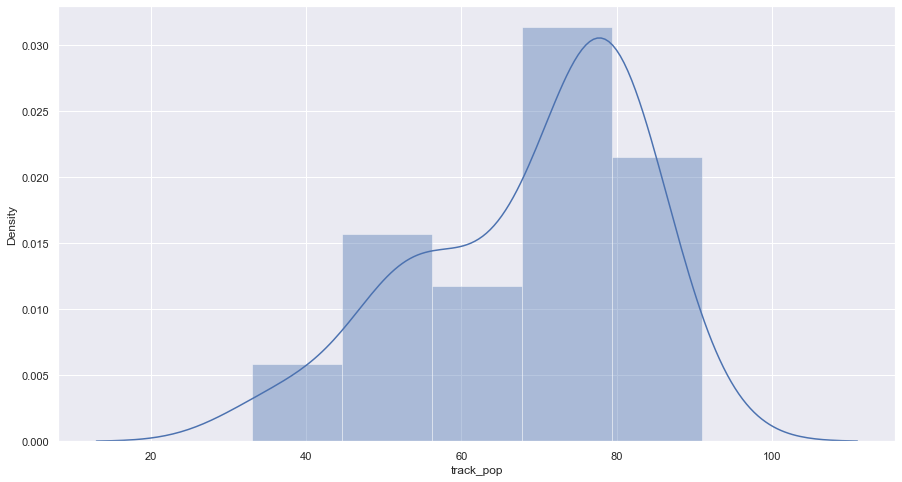

In [132]:
sns.distplot(songs_50_df_num['track_pop']) # plotting distribution of track popularity

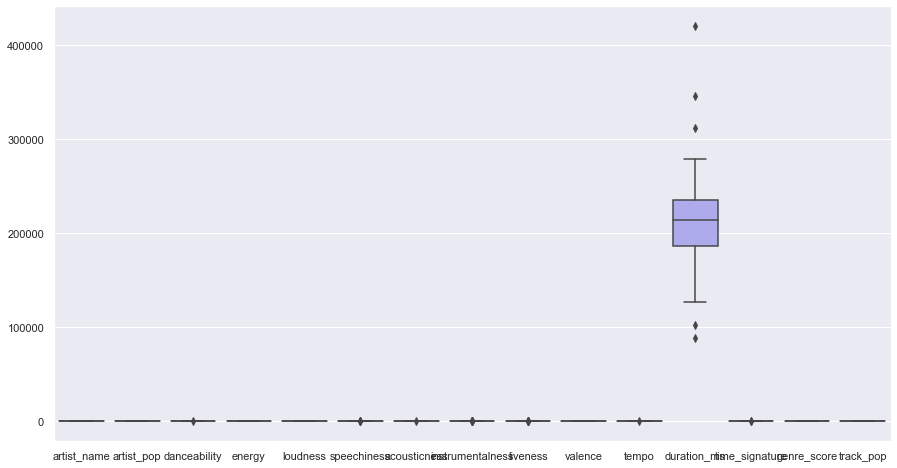

In [133]:
sns.boxplot(data=songs_50_df_num) # plotting boxplot of all the numerical columns before scaling (Standard)
sns.set(font_scale=.7)

In [134]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
songs_50_df_num_scaled = scaler.fit_transform(songs_50_df_num) # scaling numerical columns using min-max scaler


In [135]:
songs_50_df_num_scaled = pd.DataFrame(songs_50_df_num_scaled, columns=songs_50_df_num.columns) #converting numpy array to pandas dataframe
songs_50_df_num_scaled.head()

,artist_name,artist_pop,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_score,track_pop
0,0.552687,-0.407517,0.925943,0.358060,0.180160,-0.424060,-0.261866,-0.206728,-0.071713,-0.003461,-0.138690,-0.631835,0.218218,-0.362257,0.716552
1,1.265309,0.960083,-0.598560,-0.512860,-1.710559,-0.395963,-0.808097,0.355929,0.048000,-0.912691,0.216934,-0.538828,0.218218,-0.208995,0.930062
2,0.107298,1.036061,-0.496926,-1.443843,0.124511,-0.424800,0.585806,-0.209418,0.375636,-1.221568,-0.846974,0.001178,0.218218,1.247001,1.001232
3,-1.407024,0.808127,0.505858,0.484193,0.855957,-0.302799,-0.665440,-0.209418,-0.033909,0.070496,0.339068,-0.508173,0.218218,1.093738,0.858892
4,0.908998,0.808127,0.695574,1.385144,1.391075,-0.395224,-0.607550,-0.209418,-0.185126,1.406064,0.021190,-0.474261,0.218218,-0.285626,1.001232


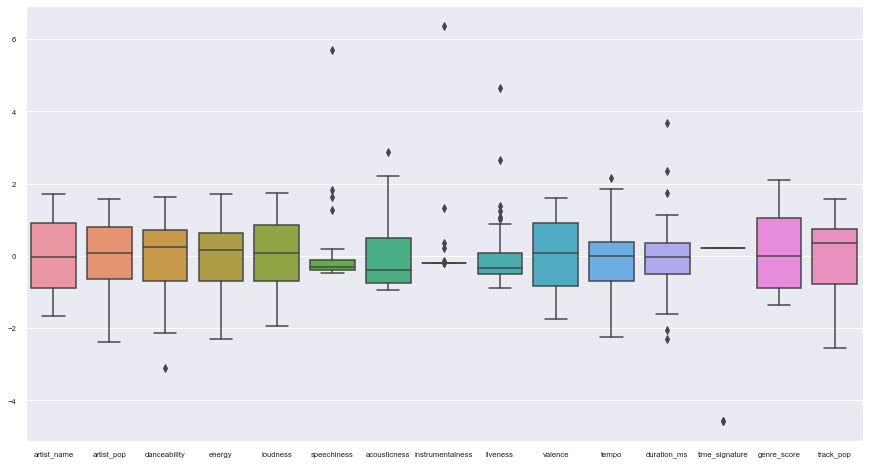

In [136]:
sns.boxplot(data=songs_50_df_num_scaled) # plotting boxplot of all the numerical columns after scaling (Standard)
sns.set(font_scale=.5)

In [137]:
# finding correlation between features and target variables
songs_50_df_corr = songs_50_df_num_scaled.corr()["track_pop"][:-1]
songs_50_df_corr
# top_features_last_played = songs_50_df_corr[abs(songs_50_df_corr) > 0.1].sort_values(ascending=False)
# print(top_features_last_played)

artist_name         0.056248
artist_pop          0.595801
danceability        0.076980
energy              0.386698
loudness            0.294162
speechiness        -0.069025
acousticness       -0.296331
instrumentalness    0.076307
liveness            0.064572
valence            -0.057368
tempo               0.120620
duration_ms        -0.174403
time_signature      0.068829
genre_score         0.291060
Name: track_pop, dtype: float64

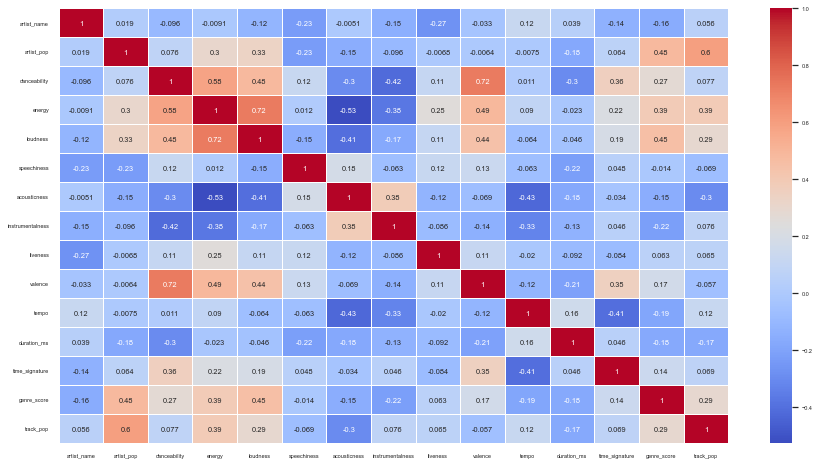

In [138]:
# creating heatmap of correlation between features and target variables
sns.heatmap(songs_50_df_num_scaled.corr(), annot=True, annot_kws={"size": 7.5}, cmap='coolwarm', linewidths=.5)
sns.set(rc = {'figure.figsize':(15,8)})

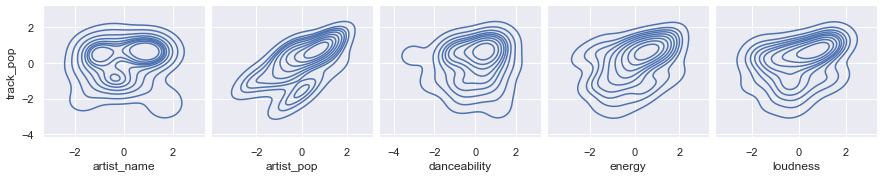

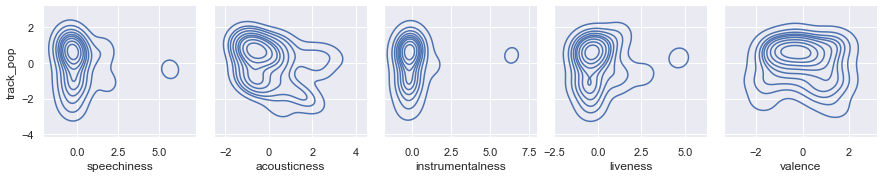

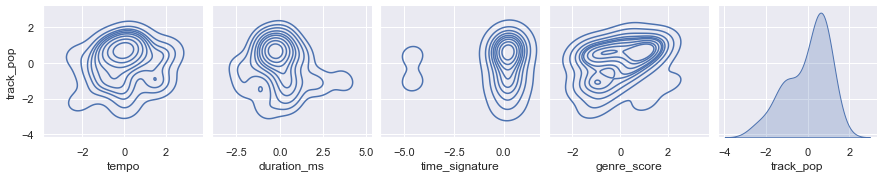

In [139]:
for i in range(0, len(songs_50_df_num_scaled.columns), 5):
    sns.pairplot(data=songs_50_df_num_scaled,
                x_vars=songs_50_df_num_scaled.columns[i:i+5],
                y_vars=["track_pop"],
                kind="kde"
                )


In [140]:
songs_50_df.head()

,track_name,artist_name,artist_pop,artist_genres,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_score,track_pop
0,Cheerleader - Felix Jaehn Remix Radio Edit,25,64,[dance pop],0.782,0.685,-6.237,0.0309,0.1660,0.000012,0.160,0.603,118.016,180566,4,13.0,79
1,Here Comes The Sun - Remastered 2009,33,82,"[beatlesque, british invasion, classic rock, m...",0.557,0.540,-10.484,0.0347,0.0339,0.002480,0.179,0.394,129.171,185733,4,15.0,82
2,Shallow,20,83,"[art pop, dance pop, pop]",0.572,0.385,-6.362,0.0308,0.3710,0.000000,0.231,0.323,95.799,215733,4,34.0,83
3,Sweet but Psycho,3,80,"[dance pop, pop]",0.720,0.706,-4.719,0.0473,0.0684,0.000000,0.166,0.620,133.002,187436,4,32.0,81
4,Tacones Rojos,29,80,"[colombian pop, latin, reggaeton colombiano]",0.748,0.856,-3.517,0.0348,0.0824,0.000000,0.142,0.927,123.031,189320,4,14.0,83


In [141]:
songs_50_df_csv = songs_50_df.to_csv('/Users/nitanshjain/Documents/Data_Science_Learning/Spotify_Recommender_System/csv/songs_50_df.csv', index=False)

```https://ink.library.smu.edu.sg/cgi/viewcontent.cgi?referer=&httpsredir=1&article=4962&context=sis_research```
```http://cs229.stanford.edu/proj2015/140_report.pdf```

```https://chartio.com/learn/charts/what-is-a-scatter-plot/```
<br>
```https://seaborn.pydata.org/generated/seaborn.pairplot.html```
